### Decision Tree Classification

CART - Classification and Regression Trees

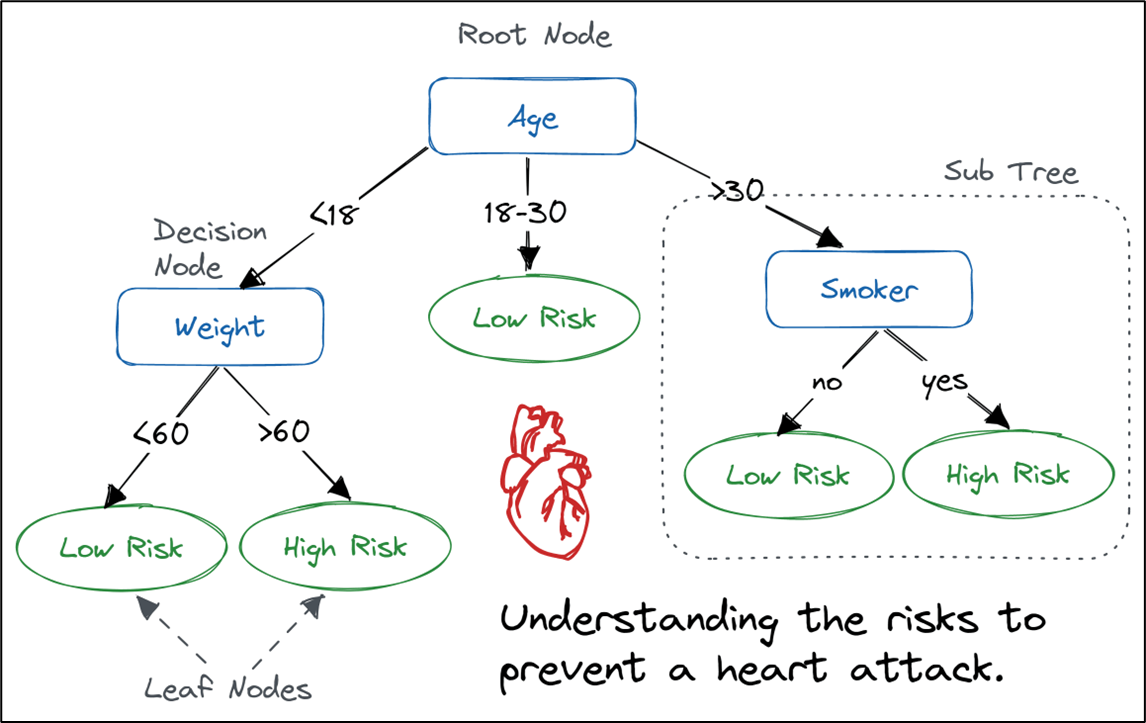

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
import pandas as pd
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df=df.drop_duplicates(keep='first').reset_index(drop=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [9]:
X = df.drop(columns=['species'])
Y=df[['species']]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Apply Preprocessing On X

In [12]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [16]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

### Apply Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.275726,0.092598,0.653295,0.401770
49,-1.018798,0.552499,-1.333255,-1.308624
65,1.034197,0.092598,0.369502,0.270202
117,2.241842,1.702254,1.674949,1.322752
55,-0.173447,-0.597255,0.426261,0.138633


In [19]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
117,virginica
55,versicolor


In [20]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052682,-1.057157,0.142468,0.007064
44,-0.898033,1.702254,-1.049462,-1.045486
7,-1.018798,0.782450,-1.276496,-1.308624
21,-0.898033,1.472303,-1.276496,-1.045486
95,-0.173447,-0.137353,0.255985,0.007064


In [21]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [22]:
xtrain.shape

(99, 4)

In [23]:
xtest.shape

(50, 4)

### Model Building

In [24]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion= "gini"
)
model1.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [25]:
model1.score(xtrain,ytrain)

0.6666666666666666

In [26]:
model1.score(xtest,ytest)

0.66

### Hyperparameter Tuning

In [27]:
params = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8],
    "min_samples_split":[5, 6, 7, 8, 9],
    "min_samples_leaf":[5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"]
}

In [28]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring="f1_macro")
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [29]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 6,
 'min_samples_split': 5}

In [30]:
gscv.best_score_

np.float64(0.9395559995559996)

In [31]:
best_dtc=gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=5)

In [32]:
best_dtc.score(xtrain,ytrain)

0.9696969696969697

In [33]:
best_dtc.score(xtest,ytest)

0.94

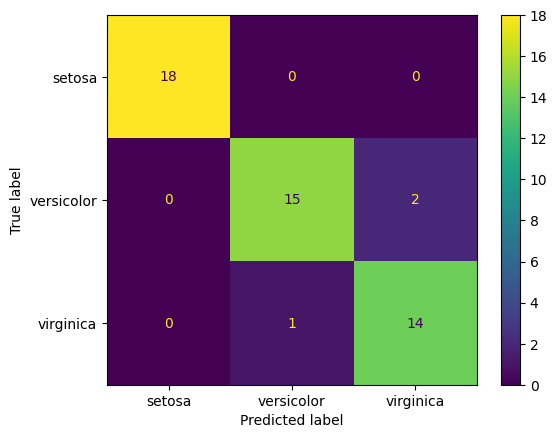

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [35]:
ypred_test = best_dtc.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [36]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.94      0.88      0.91        17
   virginica       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



### From above results i can say my model is good because f1_macro > 0.8
### Plot the tree

In [38]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [39]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

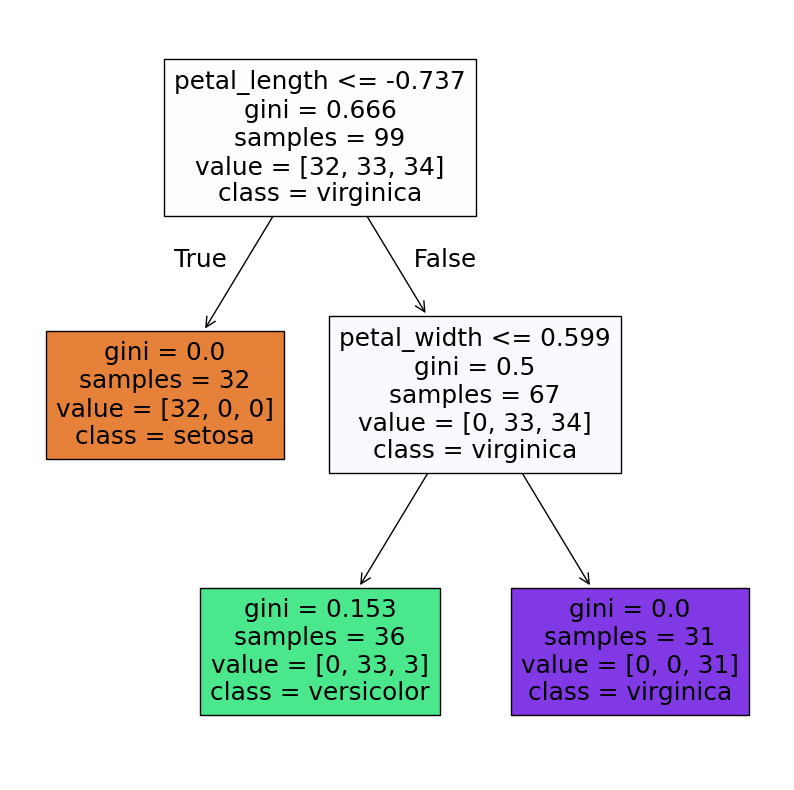

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plot_tree(best_dtc, feature_names=xtrain.columns, class_names=best_dtc.classes_, filled=True)
plt.show()

In [41]:
best_dtc.feature_importances_

array([0.        , 0.        , 0.53715888, 0.46284112])

In [42]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [43]:
imp = pd.Series(best_dtc.feature_importances_, index=xtrain.columns)
imp

sepal_length    0.000000
sepal_width     0.000000
petal_length    0.537159
petal_width     0.462841
dtype: float64

<Axes: >

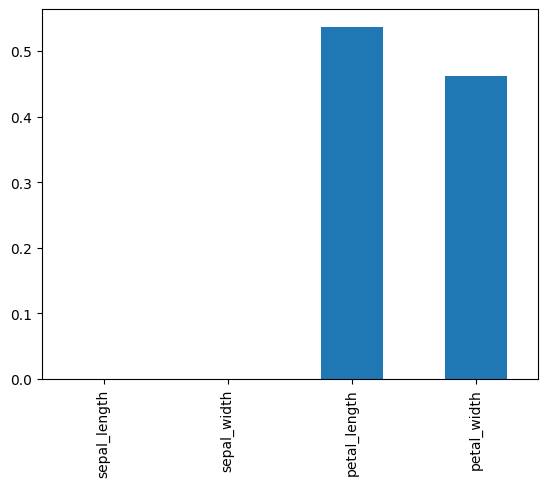

In [44]:
imp.plot(kind='bar')

### Out of Sample Prediction

In [45]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [46]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [47]:
xnew_pre=num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,-0.137353,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.138633


In [48]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477
5,-0.414976,1.012401,-1.390014,-1.308624
6,-0.294211,-0.137353,-0.084566,0.138633
7,0.792668,-0.137353,0.823571,1.059614
8,-0.656505,1.472303,-1.276496,-1.308624
9,-0.898033,0.782450,-1.276496,0.138633


In [49]:
preds = best_dtc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [50]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
probs = best_dtc.predict_proba(xnew_pre)
probs

array([[0.        , 0.91666667, 0.08333333],
       [0.        , 0.        , 1.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.        , 1.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333]])

In [52]:
xnew["species_pred"] = preds
xnew[best_dtc.classes_] = probs

In [53]:
xnew = xnew.round(4)
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,0.9167,0.0833
1,6.9,3.1,5.1,2.3,virginica,0.0,0.0000,1.0000
2,5.1,2.5,3.0,1.1,versicolor,0.0,0.9167,0.0833
3,4.4,2.9,NaN,0.2,versicolor,0.0,0.9167,0.0833
4,5.9,3.0,5.1,1.8,virginica,0.0,0.0000,1.0000
5,5.5,3.5,1.3,0.2,setosa,1.0,0.0000,0.0000
6,5.6,NaN,3.6,1.3,versicolor,0.0,0.9167,0.0833
7,6.5,3.0,5.2,2.0,virginica,0.0,0.0000,1.0000
8,5.3,3.7,1.5,0.2,setosa,1.0,0.0000,0.0000
9,5.1,3.4,1.5,NaN,setosa,1.0,0.0000,0.0000


In [54]:
xnew.to_csv("Result.csv", index=False)

### Save the model object and preprocessor with joblib

In [55]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [56]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [57]:
best_dtc

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=5)

In [60]:
import joblib


joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [61]:
# Save the model
joblib.dump(best_dtc, "dtc.joblib")

['dtc.joblib']

### Load the model object

In [62]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [63]:
m = joblib.load("dtc.joblib")
m

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=5)